In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
# 1. Membaca dataset
data_url = 'https://github.com/farrelrassya/teachingMLDL/raw/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv'
df = pd.read_csv(data_url)
print(df.head())

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


In [8]:
# 2. Melakukan encoding pada kolom target
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

In [9]:
# 3. Memisahkan fitur dan target, serta menerapkan one-hot encoding pada fitur kategorikal
features = df.drop('Class', axis=1)
kategori = features.select_dtypes(include=['object']).columns
features_encoded = pd.get_dummies(features, columns=kategori)
target = df['Class']

In [10]:
# 4. Melakukan standardisasi pada fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

In [11]:
# 5. Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [12]:
# 6. Melatih model Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [13]:
# 7. Melakukan prediksi dan menghitung probabilitas
prediksi = logreg.predict(X_test)
probabilitas = logreg.predict_proba(X_test)

In [14]:
# 8. Menghitung metrik evaluasi
akurasi = accuracy_score(y_test, prediksi)
presisi = precision_score(y_test, prediksi, average='weighted')
recall = recall_score(y_test, prediksi, average='weighted')
f1 = f1_score(y_test, prediksi, average='weighted')
auc_roc = roc_auc_score(y_test, probabilitas, multi_class='ovr')

print(f'Accuracy: {akurasi:f}')
print(f'Precision: {presisi:f}')
print(f'Recall: {recall:f}')
print(f'F1 Score: {f1:f}')
print(f'AUC-ROC: {auc_roc:f}')

Accuracy: 0.878000
Precision: 0.880067
Recall: 0.878000
F1 Score: 0.876048
AUC-ROC: 0.972305


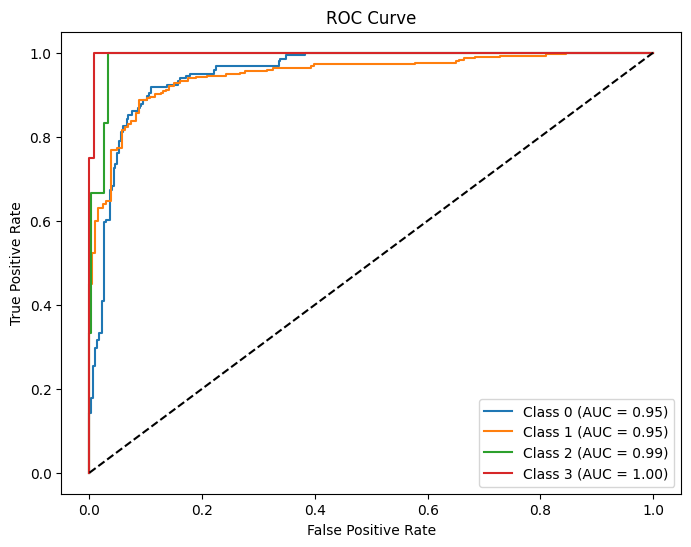

In [15]:
# 9. Membuat plot ROC Curve untuk masing-masing kelas
plt.figure(figsize=(8, 6))
n_kelas = probabilitas.shape[1]
for i in range(n_kelas):
    fpr, tpr, _ = roc_curve(y_test == i, probabilitas[:, i])
    auc_kelas = roc_auc_score(y_test == i, probabilitas[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_kelas:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()